In [193]:
#add matplotlib inline magic command
%matplotlib inline
#dependencies and setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib as mpl

In [194]:
#files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [195]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [196]:
# Get the columns and the rows that are not null.
city_data_df.count()
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()
# Get the data types of each column.
city_data_df.dtypes
# Get the unique values of the type of city.
city_data_df["type"].unique()
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

# Get the columns and the rows that are not null.
ride_data_df.count()
ride_data_df.isnull().sum()
# Get the data types of each column.
ride_data_df.dtypes

# Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [197]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban city DataFrame.
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
# Create the Rural city DataFrame.
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df



,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [198]:
# Get the number of rides for urban cities.
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
# Get the number of rides for suburban cities.
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
# Get the number of rides for rural cities.
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count


city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [199]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
print(urban_avg_fare)
print(suburban_avg_fare)
print(rural_avg_fare)

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64
city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire  

In [200]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count=suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count=rural_cities_df.groupby(["city"]).mean()["driver_count"]
print(urban_driver_count)
print(suburban_driver_count)
print(rural_driver_count)


city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64
city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey 

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

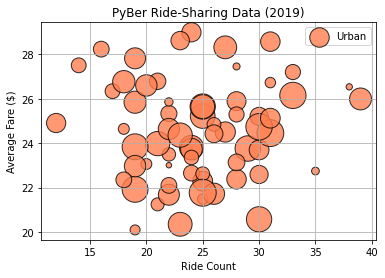

In [201]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="coral",
           alpha=0.8,
           label="Urban")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

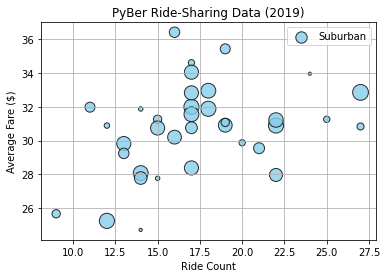

In [202]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="skyblue",
           alpha=0.8,
           label="Suburban")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")

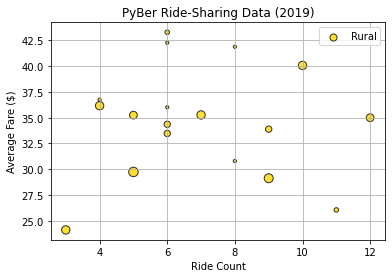

In [203]:
# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
           linewidth=1,
           edgecolor="black",
           c="gold",
           alpha=0.8,
           label="Rural")
plt.legend()
plt.xlabel("Ride Count")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.show()

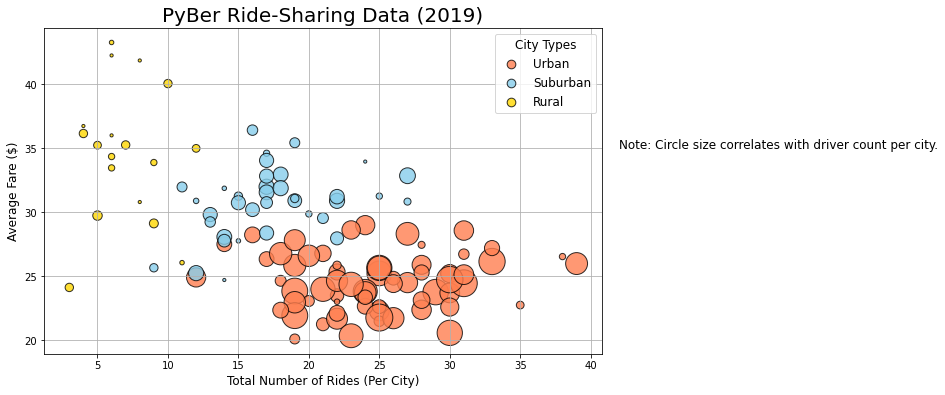

In [204]:
# Build the scatter plots for urban cities.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=10*urban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="coral",
           alpha=0.8,
           label="Urban")

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count,
           linewidth=1,
           edgecolor="black",
           c="skyblue",
           alpha=0.8,
           label="Suburban")


# Build the scatter plots for Rural cities.
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count,
           linewidth=1,
           edgecolor="black",
           c="gold",
           alpha=0.8,
           label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)",fontsize=20)
plt.grid(True)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


plt.show()

In [205]:
# Save the figure.
plt.savefig("Analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [206]:
# Get summary statistics.
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [207]:
# Get summary statistics.
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [208]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [209]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [210]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [211]:
urban_ride_count.head(50)


city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
East Kaylahaven        29
Erikaland              12
Grahamburgh            25
Huntermouth            24
Hurleymouth            28
Jerryton               25
Johnton                21
Joneschester           25
Justinberg             30
Karenberg              17
Karenside              28
Lake Danielberg        26
Lake Jonathanshire     24
Lake Scottton          24
Leahton                21
Liumouth               33
Loganberg              28
Martinezhaven          24
New Jacobville         18
New Kimberlyborough    30
New Paulton            19
New Paulville          22
North Barbara          22
North Jasmine          30
North Jason            35
North Madeline         25
North Markport         14
Pattyland              21
Port Angela            19
Port David             22
Port Frank             33
Port Johnbury          22
Port Samanthamouth     25
Raymond

In [212]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count=np.mean(urban_ride_count)
print(f"The mean for the urban ride counts is {mean_urban_ride_count:.2f}.")
# print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count=np.median(urban_ride_count)
print(f"The median for the urban ride counts is {median_urban_ride_count:.2f}.")
# mode_urban_ride_count=sts.mode(urban_ride_count)
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean for the suburban ride count is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count=np.median(suburban_ride_count)
print(f"The median for the suburban ride counts is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the suburban ride count is {mode_suburban_ride_count}.")
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean for the rural ride count is {mean_rural_ride_count:.2f}.")
median_rural_ride_count=np.median(rural_ride_count)
print(f"The median for the median rural ride count is {median_rural_ride_count:.2f}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the rural ride count is {mode_rural_ride_count}.")













The mean for the urban ride counts is 24.62.
The median for the urban ride counts is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
The mean for the suburban ride count is 17.36.
The median for the suburban ride counts is 17.0.
The mode for the suburban ride count is ModeResult(mode=array([17]), count=array([7])).
The mean for the rural ride count is 6.94.
The median for the median rural ride count is 6.00.
The mode for the rural ride count is ModeResult(mode=array([6]), count=array([5])).


In [213]:
# Get the fares for the urban cities.
urban_fares=urban_cities_df["fare"]
urban_fares
suburban_fares=suburban_cities_df["fare"]
suburban_fares
rural_fares=rural_cities_df["fare"]
rural_fares

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
        ...  
2370    13.38
2371    20.76
2372    11.11
2373    44.94
2374    55.84
Name: fare, Length: 125, dtype: float64

In [214]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares=np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares=sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")
mean_suburban_fares=np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares=np.median(suburban_fares)
print(f"The median fare price for suburban fares is ${median_suburban_fares:.2f}.")
mode_suburban_fares=sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")
mean_rural_fares=np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares=np.median(rural_fares)
print(f"The median rural fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares=sts.mode(rural_fares)
print(f"The mode rural fare price for rural trips is {mode_rural_fares}.")



















The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).
The mean fare price for suburban trips is $30.97.
The median fare price for suburban fares is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).
The mean fare price for rural trips is $34.62.
The median rural fare price for rural trips is $37.05.
The mode rural fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [215]:
urban_drivers=urban_cities_df["driver_count"]
suburban_drivers=suburban_cities_df["driver_count"]
suburban_drivers
rural_drivers=rural_cities_df["driver_count"]
rural_drivers
urban_cities_df




,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [216]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers=np.mean(urban_drivers)
print(f"The mean for the number of drivers in urban cities is {mean_urban_drivers:.2f}.")
median_urban_drivers=np.median(urban_drivers)
print(f"The median for the number of drivers in urban cities is {median_urban_drivers:.2f}.")
mode_urban_drivers=sts.mode(urban_drivers)
print(f"The mode for the number of drivers in urban cities is {mode_urban_drivers}.")
mean_suburban_drivers=np.mean(suburban_drivers)
print(f"The mean for the number of drivers in suburban cities is {mean_suburban_drivers:.2f}.")
median_suburban_drivers=np.median(suburban_drivers)
print(f"The median for the number of drivers in suburban cities is {median_suburban_drivers:.2f}.")
mode_suburban_drivers=sts.mode(suburban_drivers)
print(f"The mode for the number of drivers in suburban cities is {mode_suburban_drivers}.")
mean_rural_drivers=np.mean(rural_drivers)
print(f"The mean for the number of drivers in rural towns is {mean_rural_drivers:.2f}.")
median_rural_drivers=np.median(rural_drivers)
print(f"The median for the number of drivers in rural towns is {median_rural_drivers:.2f}.")
mode_rural_drivers=sts.mode(rural_drivers)
print(f"The mode for the number of drivers in rural towns is {mode_rural_drivers}.")
























The mean for the number of drivers in urban cities is 36.68.
The median for the number of drivers in urban cities is 37.00.
The mode for the number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).
The mean for the number of drivers in suburban cities is 13.71.
The median for the number of drivers in suburban cities is 16.00.
The mode for the number of drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).
The mean for the number of drivers in rural towns is 4.30.
The median for the number of drivers in rural towns is 4.00.
The mode for the number of drivers in rural towns is ModeResult(mode=array([1]), count=array([32])).


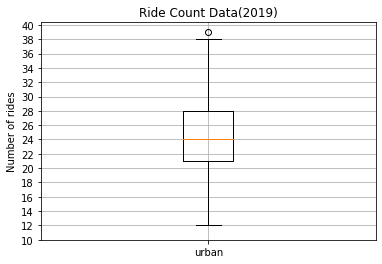

In [217]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels=["urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

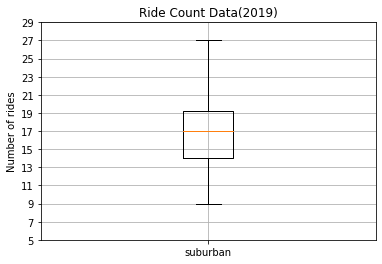

In [218]:
# Create a box-and-whisker plot for the suburban cities ride count.
x_labels=["suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(5,30,step=2.0))
ax.grid()
plt.show()




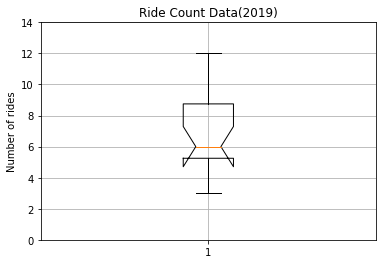

In [219]:
# Create a box-and-whisker plot for the rural cities ride count.
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count,x_labels)
ax.set_title("Ride Count Data(2019)")
ax.set_ylabel("Number of rides")
ax.set_yticks(np.arange(0,15,step=2.0))
ax.grid()
plt.show()

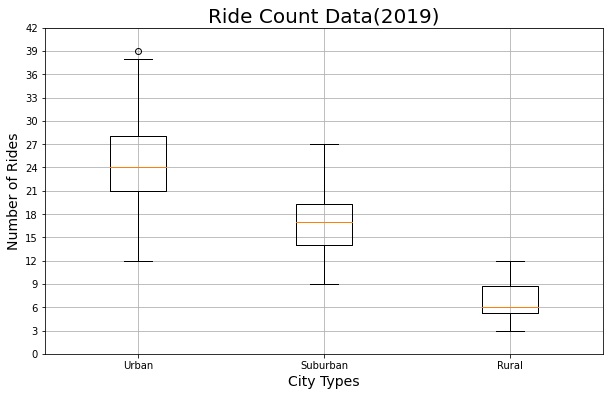

In [220]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels=["Urban", "Suburban", "Rural"]
ride_count_data=[urban_ride_count, suburban_ride_count,rural_ride_count]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data(2019)",fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data,labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
# Save the figure.
plt.savefig("Resources/Fig2.png")
plt.show()


In [221]:
# Get the city that matches 39.
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest ride count")

West Angela has the highest ride count


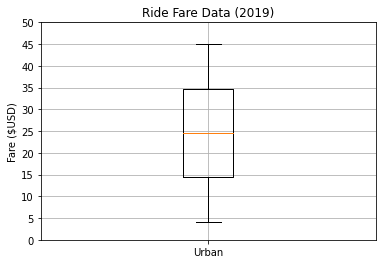

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [222]:
# Create a box-and-whisker plot for the urban fare data.
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

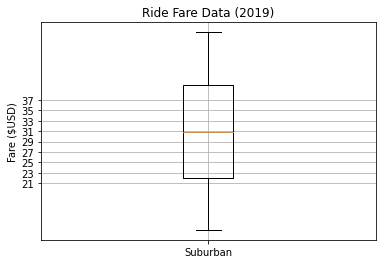

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [223]:
# Create a box-and-whisker plot for the suburban fare data.
x_labels=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(21,39,step=2.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()



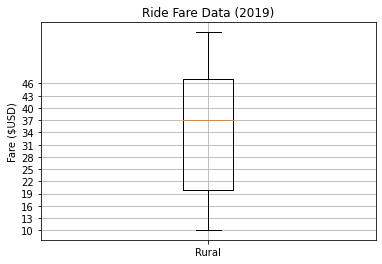

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [224]:
# Create a box-and-whisker plot for the rural fare data.
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_fares,labels=x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10,47,step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()


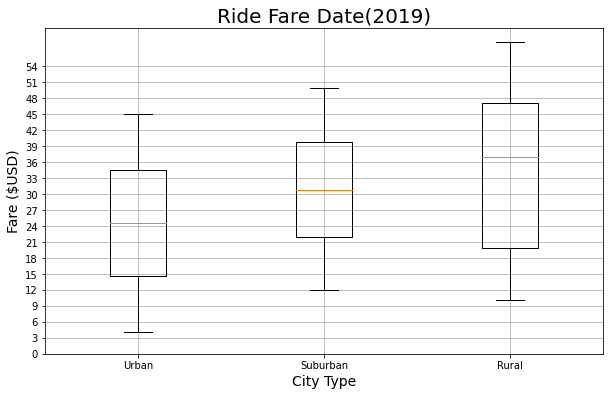

<Figure size 432x288 with 0 Axes>

In [225]:
#make a boxplot for all 3 fares
x_labels=["Urban","Suburban","Rural"]
fares_by_type=[urban_fares, suburban_fares,rural_fares]
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Date(2019)",fontsize=20)
ax.set_ylabel("Fare ($USD)",fontsize=14)
ax.set_xlabel("City Type",fontsize=14)
ax.boxplot(fares_by_type,labels=x_labels)
ax.set_yticks(np.arange(0,55,step=3.0))
ax.grid()
plt.show()
plt.savefig("Resources/Fig3.png")



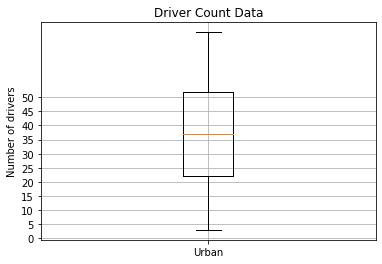

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [226]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels=["Urban"]
fig,ax=plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title("Driver Count Data")
ax.set_ylabel("Number of drivers")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()






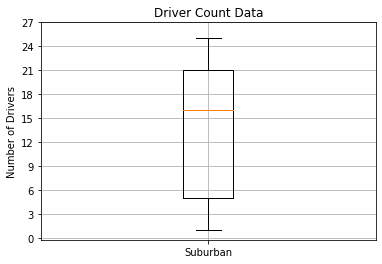

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [227]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels=["Suburban"]
fig,ax=plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30,step=3.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

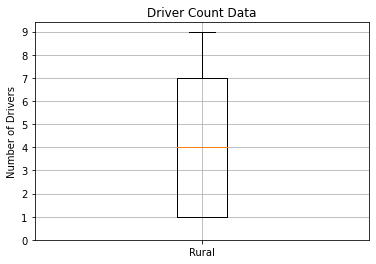

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [228]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels=["Rural"]
fig,ax=plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
ax.set_title("Driver Count Data")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,10,step=1.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

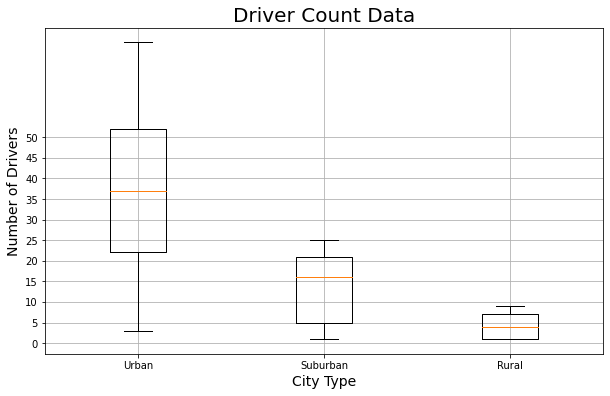

<Figure size 432x288 with 0 Axes>

In [229]:
#make a boxplot for all 3 driver data
x_label=["Urban", "Suburban","Rural"]
drivers_for_all_3=urban_drivers,suburban_drivers,rural_drivers
fig,ax=plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data",fontsize=20)
ax.set_ylabel("Number of Drivers",fontsize=14)
ax.set_xlabel("City Type",fontsize=14)
ax.boxplot(drivers_for_all_3,labels=x_label)
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()
plt.savefig("Resources/Fig4.png")

In [230]:
# Get the sum of the fares for each city type.
# sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
# sum_fares_by_type
# # Get the sum of all the fares.
# total_fares=pyber_data_df.groupby(["fare"]).sum()
# total_fares
# # Calculate the percentage of fare for each city type.
# type_percents = 100 * sum_fares_by_type / total_fares
# type_percents
type_percents=100*pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df.sum()["fare"]
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

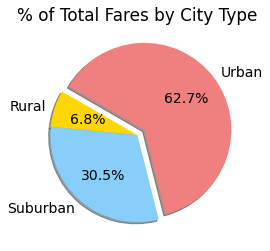

<Figure size 432x288 with 0 Axes>

In [232]:
# Build the percentage of fares by city type pie chart.
colors=["gold","lightskyblue","lightcoral"]
plt.pie(type_percents,
        labels=("Rural","Suburban","Urban"),
        colors=colors,
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        shadow=True,
        startangle=150
       )
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams["font.size"]=14
plt.show()
#Save figure
plt.savefig("Resources/Fig5.png")

In [235]:
ride_percents=100*pyber_data_df.groupby("type").count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

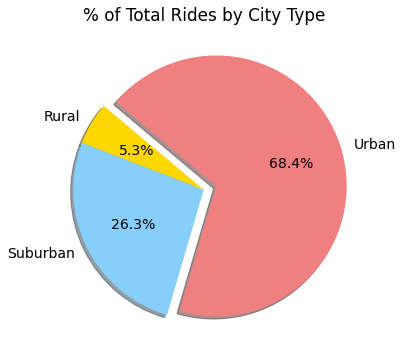

In [245]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,labels=["Rural","Suburban","Urban"],colors=["gold","lightskyblue","lightcoral"],explode=[0,0,0.1],autopct="%1.1f%%",shadow=True,startangle=140)
mpl.rcParams["font.size"]=14
plt.title("% of Total Rides by City Type")
plt.savefig("Resources/Fig6.png")
plt.show()

In [248]:
# Calculate the percentage of drivers for each city type.
driver_percents=100*pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

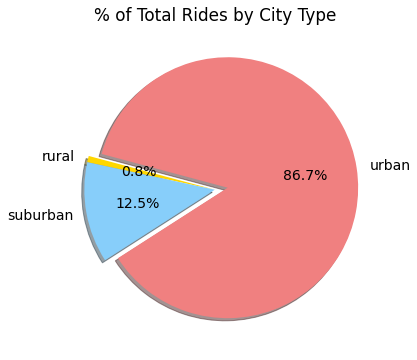

In [255]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,labels=["rural","suburban","urban"],colors=["gold","lightskyblue","lightcoral"],autopct="%1.1f%%",explode=[0,0,0.1],shadow=True,startangle=165)
mpl.rcParams["font.size"]=14
plt.title("% of Total Rides by City Type")
plt.savefig("Resources/Fig7.png")

